In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
data_Jan =pd.read_csv(r"C:\Users\HP\Desktop\Data-Sets\Sales_January_2019.csv")
data_Feb =pd.read_csv(r"C:\Users\HP\Desktop\Data-Sets\Sales_February_2019.csv")
data_Mar =pd.read_csv(r"C:\Users\HP\Desktop\Data-Sets\Sales_March_2019.csv")
data_Apr =pd.read_csv(r"C:\Users\HP\Desktop\Data-Sets\Sales_April_2019.csv")


In [25]:
data_Apr.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [26]:
df = pd.concat([data_Jan,data_Feb,data_Mar,data_Apr], ignore_index=True)


In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,01-05-2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [28]:
#checking for missing values in the data
df.isnull().sum()

Order ID            10
Product             10
Quantity Ordered    10
Price Each          10
Order Date          10
Purchase Address    10
dtype: int64

In [29]:
#checking for the datatypes in the data
df.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [30]:
#checking for the columns
df.columns


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [31]:

# Convert data types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check data types after conversion
print(df.dtypes)


C:\Users\HP\AppData\Local\Temp\ipykernel_2740\303283871.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [32]:
#For the missing values i opted to drop them
df.dropna(inplace=True)

In [33]:
#Taking the last five row of the data 
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4178,177507,AAA Batteries (4-pack),1.0,2.99,2019-04-09 20:13:00,"825 2nd St, Portland, OR 97035"
4179,177508,Bose SoundSport Headphones,1.0,99.99,2019-04-07 06:45:00,"845 Lakeview St, San Francisco, CA 94016"
4180,177509,AAA Batteries (4-pack),1.0,2.99,2019-04-28 19:03:00,"616 9th St, New York City, NY 10001"
4181,177510,Bose SoundSport Headphones,1.0,99.99,2019-04-15 09:51:00,"182 Main St, San Francisco, CA 94016"
4182,177511,iPhone,1.0,700.00,2019-04-07 17:38:00,"719 North St, Los Angeles, CA 90001"


In [34]:
#Answering the questions for the reason for analysis


In [35]:
# Group by 'Product' and sum the 'Quantity Ordered'
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)

# Display the result
print(top_products)

Product
AAA Batteries (4-pack)      715.0
AA Batteries (4-pack)       612.0
USB-C Charging Cable        568.0
Lightning Charging Cable    519.0
Wired Headphones            448.0
Name: Quantity Ordered, dtype: float64


In [36]:
least_products = df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False).tail(5)
#Displaying the result
print(least_products)

Product
ThinkPad Laptop       86.0
20in Monitor          83.0
Vareebadd Phone       44.0
LG Washing Machine    15.0
LG Dryer              12.0
Name: Quantity Ordered, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_2740\295336605.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="Blues_r")


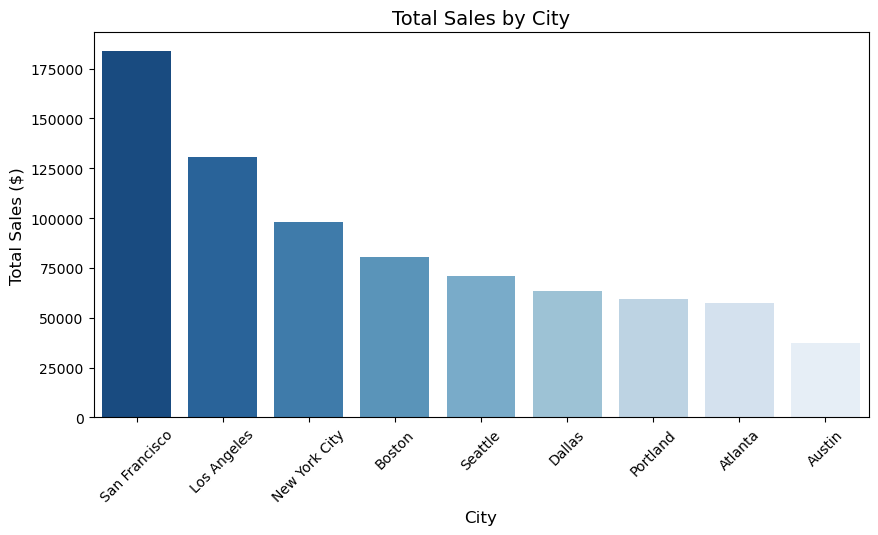

In [37]:
# Extract city from 'Purchase Address'
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Compute total sales per city
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot sales variation by city (region)
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette="Blues_r")

# Formatting
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.title("Total Sales by City", fontsize=14)
plt.xticks(rotation=45)  # Rotate city names for better readability

# Show plot
plt.show()

In [38]:
# Extract city from 'Purchase Address'
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Filter only San Francisco sales
sf_sales = df[df['City'] == 'San Francisco']

# Group by product and sum the quantity ordered
most_sold_product_sf = sf_sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Display the most sold product
print(most_sold_product_sf.head(1))  # Show the top-selling product

Product
AAA Batteries (4-pack)    178.0
Name: Quantity Ordered, dtype: float64


In [39]:
# Group by product and sum the quantity ordered
least_sold_product = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)

# Display the least sold product
print(least_sold_product.head(1))  # Show the least-selling product

Product
LG Dryer    12.0
Name: Quantity Ordered, dtype: float64


In [40]:
# Display all unique products ordered
all_products = df['Product'].unique()

# Print the list of products
print("All products ordered:")
print(all_products)

All products ordered:
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']


In [41]:
#To show product shown by a certain order id
# Example Order ID (replace with your desired Order ID)
order_id = 4179  # Change this to the specific Order ID you want to check

# Filter the DataFrame to get details of the given Order ID
order_details = df[df['Order ID'] == order_id]

# Display the details
print(order_details)


Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, City, Sales]
Index: []


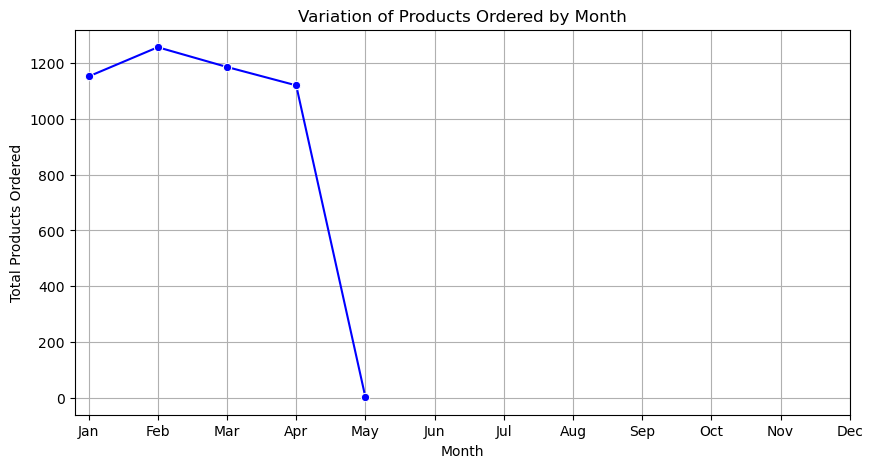

In [42]:

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month from 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Group by month and sum the quantity ordered
monthly_sales = df.groupby('Month')['Quantity Ordered'].sum()

# Plot the variation of products ordered by month
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", linestyle="-", color="b")

# Formatting the plot
plt.xlabel("Month")
plt.ylabel("Total Products Ordered")
plt.title("Variation of Products Ordered by Month")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])  # Display months in readable format
plt.grid(True)

# Show the plot
plt.show()


In [43]:
#best way to show relationship between sales and quantity ordered
#In your dataset, Sales ($) is the total revenue generated from an order

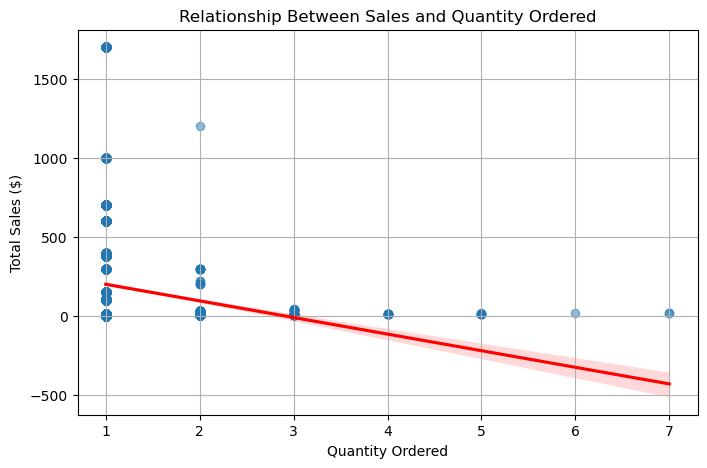

In [44]:
#Relationship between sales and Quantity ordered
# Calculate Sales ($) column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

# Plot scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Quantity Ordered'], y=df['Sales'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Formatting the plot
plt.xlabel("Quantity Ordered")
plt.ylabel("Total Sales ($)")
plt.title("Relationship Between Sales and Quantity Ordered")
plt.grid(True)

# Show the plot
plt.show()
